In [160]:
import numpy as np
import skfuzzy as fuzz
import gymnasium as gym
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
from IPython import display

# part 1 
### graphic motion

In [161]:
env = gym.make("Pendulum-v1", render_mode="human") 

In [162]:
observation  = env.reset()
env.render()
for i in range (10):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    env.render()
    print( observation, reward, terminated, truncated, info)
   
    if observation[0] >= 0.99 and observation[2] <= 1.5:
        print(observation, reward, terminated, truncated, info)
        break
env.close()

[-0.99955785 -0.02973441  0.03509195] -9.694735569399267 False False {}
[-0.99953365 -0.03053601  0.01603942] -9.683758070502288 False False {}
[-0.9992788  -0.0379725   0.14881732] -9.679746758530353 False False {}
[-0.99934006 -0.03632488 -0.03297506] -9.635660715688198 False False {}
[-0.99947697 -0.03233793 -0.07978612] -9.64276404091618 False False {}
[-0.99915624 -0.04107118  0.17478323] -9.671521656881088 False False {}
[-0.9988813  -0.0472884   0.12446623] -9.616233623564252 False False {}
[-0.9989833  -0.04508128 -0.04418948] -9.576947236874943 False False {}
[-0.99936163 -0.03572614 -0.18725656] -9.589013806574071 False False {}
[-0.99977064 -0.02141516 -0.2863389 ] -9.650098336676793 False False {}


# part 2 

In [163]:
position_x = ctrl.Antecedent(np.arange(-1, 1, 0.01), 'position_x')
position_y = ctrl.Antecedent(np.arange(-1, 1, 0.01), 'position_y')
angular_speed = ctrl.Antecedent(np.arange(-8, +8, 0.01), 'angular_speed')
torque = ctrl.Consequent(np.arange(-2, 2, 0.01), 'torque') 

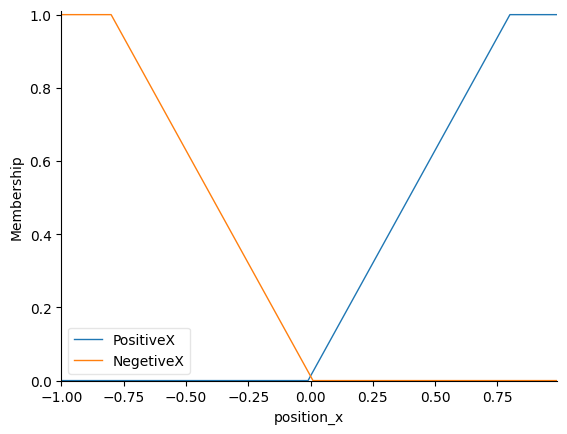

In [164]:
#Negative x and positive x 
position_x['PositiveX'] = fuzz.trapmf(position_x.universe, [-0.01, 0.8, 1, 1])
position_x['NegetiveX'] = fuzz.trapmf(position_x.universe, [-1, -1, -0.8, 0.01])
position_x.view()


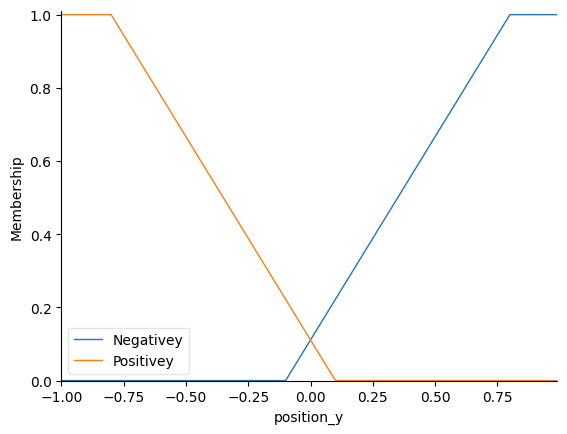

In [165]:
position_y['Negativey'] = fuzz.trapmf(position_y.universe, [-0.1, 0.8, 1, 1])
position_y['Positivey'] = fuzz.trapmf(position_y.universe, [-1, -1, -0.8, 0.1])
position_y.view()

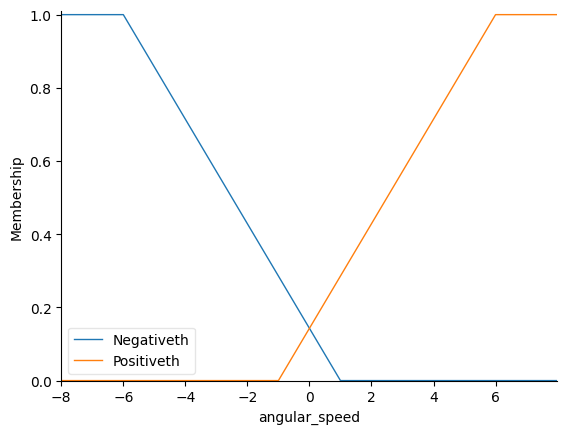

In [166]:
angular_speed['Negativeth'] = fuzz.trapmf(angular_speed.universe, [-8, -8, -6, 1])  # negative clockwise
angular_speed['Positiveth'] = fuzz.trapmf(angular_speed.universe, [-1, 6, +8, +8])
angular_speed.view()


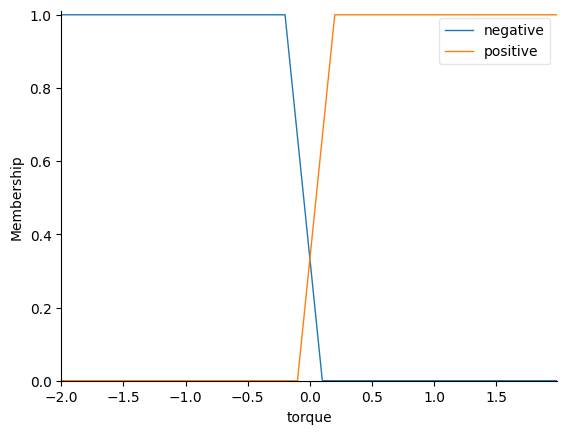

In [167]:
torque['negative'] = fuzz.trapmf(torque.universe, [-2, -2, -0.2, 0.1])
torque['positive'] = fuzz.trapmf(torque.universe, [-0.1, 0.2, 2, 2])
torque.view()

In [168]:
rule1 = ctrl.Rule(position_x['NegetiveX'] & angular_speed['Negativeth'], torque['negative'])
rule2 = ctrl.Rule(position_x['NegetiveX'] & angular_speed['Positiveth'], torque['positive'])
rule3 = ctrl.Rule(position_x['PositiveX'] & angular_speed['Negativeth'], torque['positive'])
rule4 = ctrl.Rule(position_x['PositiveX'] & angular_speed['Positiveth'], torque['negative'])

In [169]:
controller = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
simulator = ctrl.ControlSystemSimulation(controller)
print(simulator.input)

position_x : None
angular_speed : None



In [170]:
reward_history = []
env = gym.make("Pendulum-v1", render_mode="human") 
observation, _ = env.reset()
for _ in range(500):
    simulator.input['position_x'] = observation[0]
    simulator.input['angular_speed'] = observation[2]
    simulator.compute()
    decision = simulator.output['torque']
    # print(  , decision = simulator.output['torque'])
    observation, reward, terminated, truncated, info = env.step([decision])
    reward_history.append(reward)
    # Make it easier
    if observation[0] >= 0.99 and -1.5<=observation[2] and observation[2] <= 1.5:
        terminated=True
    
    env.render()
    
    if terminated:
        print(f'You Win in {_} iteration!')
        break

env.close()

You Win in 57 iteration!


58


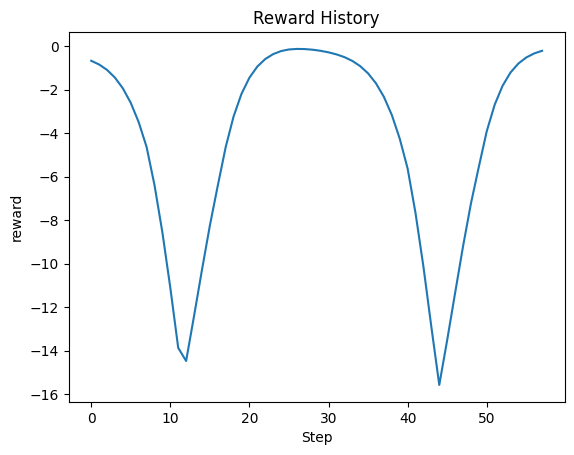

In [171]:
print(len(reward_history))
plt.plot(range(len(reward_history)), reward_history)
plt.xlabel('Step')
plt.ylabel('reward')
plt.title('Reward History')
plt.show()